**DATA DESCRIPTION**

In [ ]:
#libraries to import
import collections
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import json

import warnings

# Ignore all FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [87]:
'''
Load the processed data to a pandas dataframe in order to analyze all the information
'''

file_path = "../../data/processed_docs.jsonl"
docs = []


with open(file_path, "r", encoding="utf-8") as f:
    lines = [line.strip() for line in f if line.strip()]


df = pd.DataFrame([json.loads(line) for line in lines])
# general information about the dataframe structure:
        #entries
        #columns
        #variables type 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28080 entries, 0 to 28079
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   pid                    28080 non-null  object 
 1   title_clean            28080 non-null  object 
 2   description_clean      28080 non-null  object 
 3   product_details_clean  28080 non-null  object 
 4   brand                  28080 non-null  object 
 5   category               28080 non-null  object 
 6   sub_category           28080 non-null  object 
 7   seller                 28080 non-null  object 
 8   out_of_stock           28080 non-null  bool   
 9   selling_price          28078 non-null  float64
 10  discount               28080 non-null  float64
 11  actual_price           27303 non-null  float64
 12  average_rating         25819 non-null  float64
 13  url                    28080 non-null  object 
dtypes: bool(1), float64(4), object(9)
memory usage: 2.8+ M

In [88]:
#describes the main statistics of the numerical attributes
df.describe()

,selling_price,discount,actual_price,average_rating
count,28078.000000,28080.000000,27303.000000,25819.000000
mean,705.635088,0.487266,1455.528110,3.627724
std,549.681489,0.187367,939.977456,0.663429
min,99.000000,0.000000,150.000000,1.000000
25%,390.000000,0.370000,849.000000,3.200000
50%,545.000000,0.520000,1199.000000,3.800000
75%,820.000000,0.620000,1799.000000,4.100000
max,7999.000000,0.870000,12999.000000,5.000000


In [89]:
#identifies unique values in some of the categorical attributes
cols=[ 'category', 'out_of_stock', 'sub_category']
for i in cols:
    print(f"Unique values in {i}: {df[i].unique().tolist()}")

Unique values in category: ['Clothing and Accessories', 'Bags, Wallets & Belts', 'Footwear', 'Toys']
Unique values in out_of_stock: [False, True]
Unique values in sub_category: ['Bottomwear', 'Clothing Accessories', 'Winter Wear', 'Raincoats', 'Topwear', 'Innerwear and Swimwear', 'Kurtas, Ethnic Sets and Bottoms', 'Blazers, Waistcoats and Suits', 'Tracksuits', 'Sleepwear', 'SUNSHOPPING Bags, Wallets & Belts', 'Sunshopping Bags, Wallets & Belts', 'Crocks Club Clothing and Accessories', "Men's Footwear", 'Fabrics', 'Inspire Clothing and Accessories', 'INSPIRE Clothing and Accessories', 'Winsome Deal Bags, Wallets & Belts', 'Roy Clothing and Accessories', 'YOFAMA Bags, Wallets & Belts', 'Party Supplies', 'Brand Trunk Bags, Wallets & Belts', 'mentiezi Bags, Wallets & Belts', 'Uber Urban Clothing and Accessories']


**EXPLORATORY ANALYSIS**

OUT OF STOCK DISTRIBUTION

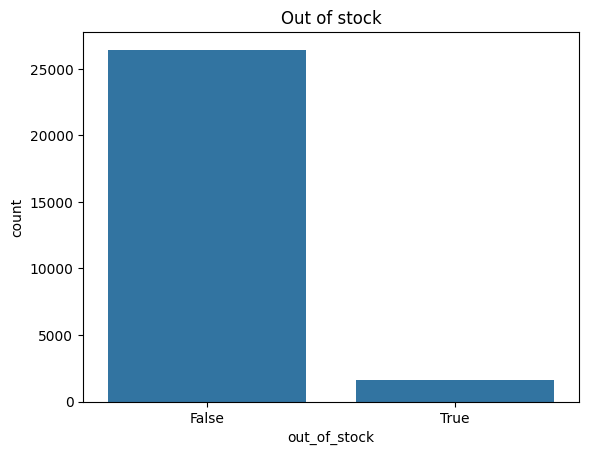

out_of_stock
False    26436
True      1644
Name: count, dtype: int64


In [90]:
#barplot of the out of stock variable
sns.countplot(x='out_of_stock', data=df)
plt.title('Out of stock')
plt.show()

print(df['out_of_stock'].value_counts())

RATINGS ANALYSIS

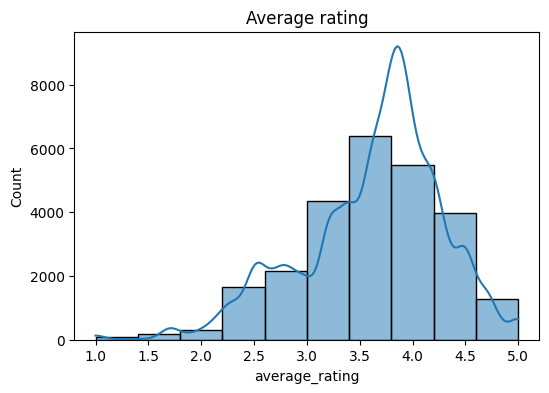

In [91]:
#Plot a histogram of the average rating 
plt.figure(figsize=(6,4))
sns.histplot(df['average_rating'],bins=10,kde=True)
plt.title("Average rating")
plt.show()

BRAND ANALYSIS

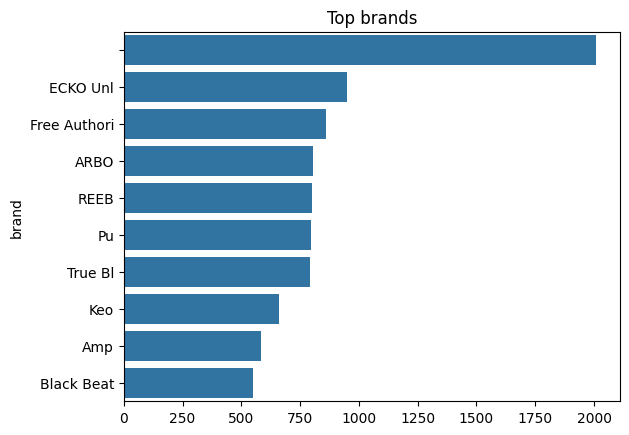

In [92]:
#histogram of the top brands 
top_brands=df['brand'].value_counts().head(10)
sns.barplot(x=top_brands.values, y=top_brands.index)
plt.title('Top brands')
plt.show()


brand
VARTe                 5.000000
MILD                  5.000000
VIKING.INE            4.640000
SORA                  4.609459
COL                   4.550000
Modest Ci             4.500000
PixF                  4.462195
Cots                  4.444043
GYMBROTHE             4.407143
JUARI BE A GENTLEM    4.400000
Name: average_rating, dtype: float64


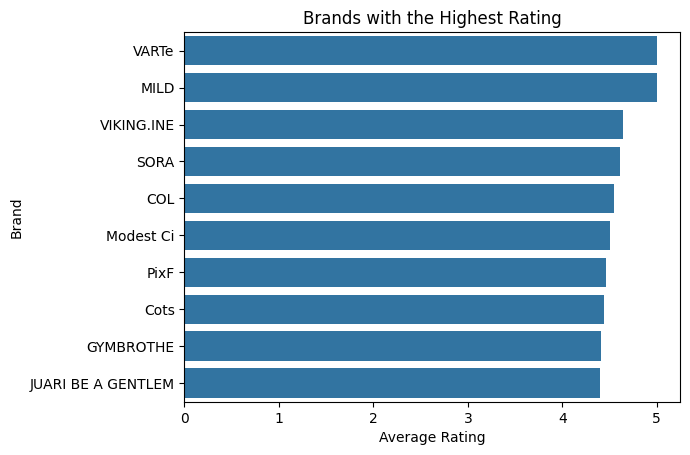

In [ ]:
# BEST RATED BRANDS
good_brand_ratings = df.groupby('brand')['average_rating'].mean().sort_values(ascending=False)
top_rated_brands = good_brand_ratings.head(10)
print(top_rated_brands)
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(x=top_rated_brands.values, y=top_rated_brands.index)
plt.xlabel("Average Rating")
plt.ylabel("Brand")
plt.title("Brands with the Highest Rating")
plt.show()

brand
K J TRADE         1.300000
VRAJCREATI        1.600000
CA                1.788024
ShreeR            1.900000
shree khodaldh    2.000000
shil              2.000000
Lafabriquei       2.050000
TRANSPERAN        2.200000
Sketch Vib        2.300000
ta                2.300000
Name: average_rating, dtype: float64


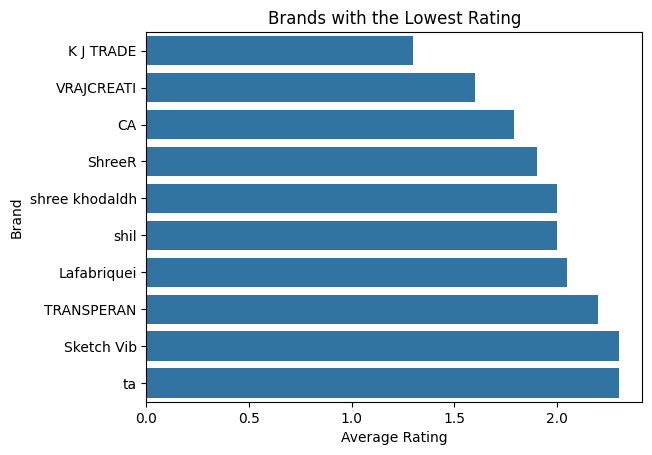

In [ ]:
# WORST RATED BRANDS

bad_brand_ratings = df.groupby('brand')['average_rating'].mean().sort_values(ascending=True)
worst_rated_brands = bad_brand_ratings.head(10)
print(worst_rated_brands)
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(x=worst_rated_brands.values, y=worst_rated_brands.index)
plt.xlabel("Average Rating")
plt.ylabel("Brand")
plt.title("Brands with the Lowest Rating")
plt.show()

CATEGORY ANALYSIS

In [ ]:
avg_price_per_category = df.groupby('category')['selling_price'].mean().sort_values(ascending=False)
print('Average price spent per category:\n', avg_price_per_category)

Average price spent per category:
 category
Clothing and Accessories    713.236908
Footwear                    502.067391
Bags, Wallets & Belts       258.512195
Toys                        189.000000
Name: selling_price, dtype: float64


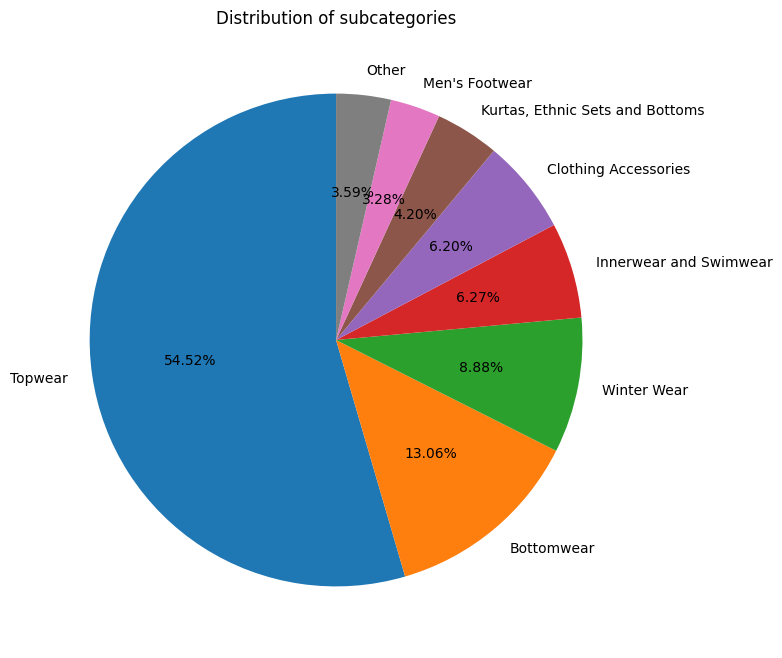

In [ ]:
subcat_counts = df['sub_category'].value_counts()

# Compute percentage of total
subcat_perc = subcat_counts / subcat_counts.sum() * 100

# Keep only subcategories with more than 5% and group the rest as 'Other'
major_subcats = subcat_perc[subcat_perc > 3]
other_perc = subcat_perc[subcat_perc <= 3].sum()
major_subcats['Other'] = other_perc

# Plot pie chart
plt.figure(figsize=(8,8))
plt.pie(major_subcats, labels=major_subcats.index, autopct='%1.2f%%', startangle=90)
plt.title('Distribution of subcategories')
plt.show()

TEXT ANALYSIS

In [94]:
#vocabulary size
all_tokens = [t for title in df['title_clean'] for t in title.split()]
print('\nVocabulary size:', len(set(all_tokens)))



Vocabulary size: 667


In [95]:
#20 most common words
word_frequency = collections.Counter(all_tokens).most_common(20)
print('Most common 20 words:', word_frequency)

Most common 20 words: [('shirt', 15838), ('women', 13146), ('men', 13060), ('neck', 11952), ('solid', 9246), ('round', 8301), ('print', 8123), ('pack', 4839), ('blue', 4378), ('fit', 3923), ('black', 3503), ('casual', 2927), ('slim', 2893), ('polo', 2668), ('collar', 2427), ('multicolor', 2373), ('white', 2175), ('sleev', 2030), ('full', 2011), ('grey', 1917)]


DISCOUNT ANALYSIS

Top 10 brands with highest average discount:
brand
Jack Roy        0.816250
fas             0.804000
Man             0.801500
Modest Ci       0.770000
SIYA SHOPIVA    0.770000
PixF            0.760256
E               0.760000
Firstlau        0.760000
KAY D           0.756098
M2Acreati       0.754000
Name: discount, dtype: float64


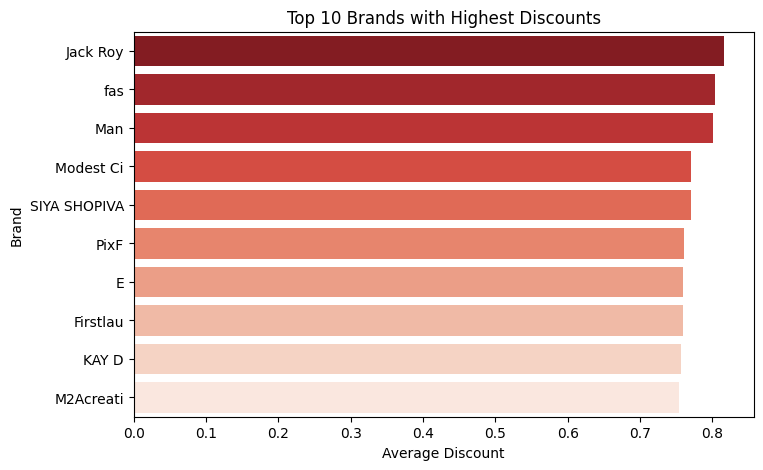

In [99]:
# Average discount per brand
brand_discounts = df.groupby('brand')['discount'].mean().sort_values(ascending=False)

# Top 10 brands with the highest average discount
top_discount_brands = brand_discounts.head(10)
print("Top 10 brands with highest average discount:")
print(top_discount_brands)

plt.figure(figsize=(8,5))
sns.barplot(x=top_discount_brands.values, y=top_discount_brands.index, palette="Reds_r")
plt.title("Top 10 Brands with Highest Discounts")
plt.xlabel("Average Discount")
plt.ylabel("Brand")
plt.show()



Top 10 brands with lowest average discount:
brand
JUARI BE A GENTLEM    0.094000
Vector                0.091062
discov                0.050000
TE                    0.000000
VIKING.INE            0.000000
Musta                 0.000000
Cre                   0.000000
HUMANITY ORIGINA      0.000000
ECOLINE Clothi        0.000000
jspcso                0.000000
Name: discount, dtype: float64


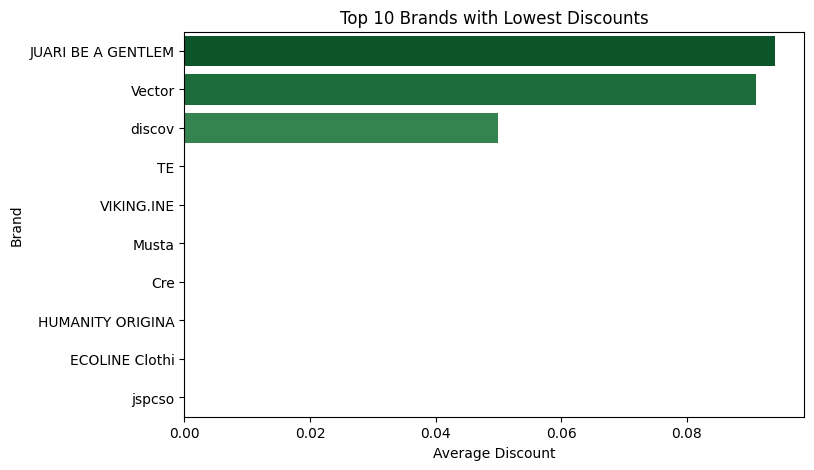

In [100]:
# Top 10 brands with the lowest average discount
lowest_discount_brands = brand_discounts.tail(10)
print("\nTop 10 brands with lowest average discount:")
print(lowest_discount_brands)

plt.figure(figsize=(8,5))
sns.barplot(x=lowest_discount_brands.values, y=lowest_discount_brands.index, palette="Greens_r")
plt.title("Top 10 Brands with Lowest Discounts")
plt.xlabel("Average Discount")
plt.ylabel("Brand")
plt.show()